# <center> A <center>

In [1]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

theta = sym.symbols('theta')

# Material properties
E_L = 400 #GPa
E_L = 400e9 #Pa
E_T = 50 #GPa
E_T = 50e9 #Pa
nu_LT = 0.1
# nu_TL = E_T/E_L*nu_LT
nu_TL = E_T/E_L*nu_LT
G_LT = 40 #GPa
G_LT = 40e9 #Pa
t = 0.1 #mm
t = 0.1e-3 #m
angle_list = [0, theta, -theta]
repetitions = 1
symmetry = True
N_x = 0 # [N/m]
N_y = 0 # [N/m]
N_xy = 10_000 # [N/m]
M_x = 0 # [Nm/m]
M_y = 0 # [Nm/m]
M_xy = 10 # [Nm/m]


In [2]:
# Q matrix
Q = sym.Matrix([[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
     [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
     [0, 0, G_LT]])

T_sigma = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                   [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                   [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])
T_epsilon = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, sym.cos(theta)*sym.sin(theta)],
                     [sym.sin(theta)**2, sym.cos(theta)**2, -sym.cos(theta)*sym.sin(theta)],
                     [-2*sym.cos(theta)*sym.sin(theta), 2*sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])

Q_list = []
def Q_bar():
    Q_bar = sym.Matrix((T_sigma.inv()) * Q * T_epsilon)
    for angle in angle_list:
        Q_list.append(sym.nsimplify(Q_bar.subs(theta, angle)))
    return Q_list

Q_list = Q_bar()
A = sym.Matrix.zeros(3,3)
for i in range(len(Q_list)):
    A += 2*t*Q_list[i]

display(sym.simplify(A))
A_inv = A.inv()

Matrix([
[ 112220275.34418*sin(theta)**4 - 252395494.36796*sin(theta)**2 + 240300375.469337, -112220275.34418*sin(theta)**4 + 112220275.34418*sin(theta)**2 + 3003754.69336671,                                                                           0],
[-112220275.34418*sin(theta)**4 + 112220275.34418*sin(theta)**2 + 3003754.69336671, 112220275.34418*sin(theta)**4 + 27954943.6795995*sin(theta)**2 + 30037546.9336671,                                                                           0],
[                                                                                0,                                                                                 0, -112220275.34418*sin(theta)**4 + 112220275.34418*sin(theta)**2 + 24000000.0]])

### The above matrix is matrix A

The third row and the third column are zero, apart from the element in both the third row and third column (--> A is an isotropic matrix). This means that there is no bending-twisting coupling. This is as expected since we have an quasi-isotropic laminate.

In [3]:
def BD_func(symmetric=False, repetitions=1, t=1):
    D = sym.Matrix.zeros(3,3)
    B = 0
    m=0
    if not symmetric:
        for i in np.arange(repetitions/2 * len(angle_list), -repetitions/2 * len(angle_list), -1):
            B += ((t*i)**2-(t*(i-1))**2)/2 * Q_list[m]
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m += 1
            if m == len(angle_list):
                m = 0
        
    if symmetric:
        B = sym.Matrix.zeros(3,3)
        repetitions = repetitions*2
        for i in np.arange(len(angle_list), 0, -1):
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m += 1
            if m == len(angle_list):
                m = 0

        if m == 0:
                m = len(angle_list)-1
                
        for i in np.arange(0, -len(angle_list), -1):
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m -= 1
            if m == -len(angle_list):
                m = 0
                
    return B, D

B, D = BD_func(symmetric=True, repetitions=1, t=1)
display(sym.nsimplify(B)/1e9)
display(sym.simplify(D)/1e9)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Matrix([
[ 1496.2703379224*sin(theta)**4 - 3365.27325823947*sin(theta)**2 + 7209.0112640801,  -1496.2703379224*sin(theta)**4 + 1496.2703379224*sin(theta)**2 + 90.1126408010013,             350.43804755945*sin(2*theta) + 140.275344180225*sin(4*theta)],
[-1496.2703379224*sin(theta)**4 + 1496.2703379224*sin(theta)**2 + 90.1126408010013, 1496.27033792241*sin(theta)**4 + 372.732582394659*sin(theta)**2 + 901.126408010012,             350.43804755945*sin(2*theta) - 140.275344180225*sin(4*theta)],
[                    350.438047559449*sin(2*theta) + 140.275344180225*sin(4*theta),                       350.43804755945*sin(2*theta) - 140.275344180225*sin(4*theta), -1496.27033792241*sin(theta)**4 + 1496.27033792241*sin(theta)**2 + 720.0]])

### Above we have the B and D matrices respectively

Non-composite material (monolithic) bend and twist under aerodynamic loads. Composite materials bend, but do not twist. This is noticeable because the order of magnitude of the third row and column is much smaller than the order of magnitude of the diagonal. And at $\theta=0$ the third row and column (apart form $D_{66}$) are $0$. This wouldn't happen if it was a monolithic isotropic plate.

In addition to the slides I used the following resources:

https://www.sciencedirect.com/topics/engineering/quasi-isotropic-laminate

In [4]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

theta = sym.symbols('theta')

# Material properties
E_L = 400 #GPa
E_L = 400e9 #Pa
E_T = 50 #GPa
E_T = 50e9 #Pa
nu_LT = 0.1
# nu_TL = E_T/E_L*nu_LT
nu_TL = E_T/E_L*nu_LT
G_LT = 40 #GPa
G_LT = 40e9 #Pa
t = 0.1 #mm
t = 0.1e-3 #m
angle_list = [0, theta, -theta]
repetitions = 1
symmetry = True
N_x = 0 # [N/m]
N_y = 0 # [N/m]
N_xy = 10_000 # [N/m]
M_x = 0 # [Nm/m]
M_y = 0 # [Nm/m]
M_xy = 10 # [Nm/m]

X_t = 700e6
X_c = -800e6
Y_t = 150e6
Y_c = -300e6
S = 150e6

angle_list = [0, theta, -theta]

Q = sym.Matrix([[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
        [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
        [0, 0, G_LT]])

T_sigma = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                    [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                    [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])

T_epsilon = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, sym.cos(theta)*sym.sin(theta)],
                    [sym.sin(theta)**2, sym.cos(theta)**2, -sym.cos(theta)*sym.sin(theta)],
                    [-2*sym.cos(theta)*sym.sin(theta), 2*sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])

Q_list = []
def Q_bar(angle):
    Q_bar = ((T_sigma.inv()) * Q * T_epsilon).subs(theta, angle)
    return Q_bar

for angle in angle_list:
    Q_list.append(sym.Matrix(Q_bar(angle)))
    
A = Q_list[0] + Q_list[1] + Q_list[2]
A = 2*t*A

def BD_func(symmetric=True, repetitions=1, t=1):
    D = sym.Matrix.zeros(3,3)
    B = sym.Matrix.zeros(3,3)
    m=0
    if not symmetric:
        for i in np.arange(repetitions/2 * len(angle_list), -repetitions/2 * len(angle_list), -1):
            B += ((t*i)**2-(t*(i-1))**2)/2 * Q_list[m]
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m += 1
            if m == len(angle_list):
                m = 0
        
    if symmetric:
        B = np.zeros((3, 3))
        repetitions = repetitions*2
        for i in np.arange(len(angle_list), 0, -1):
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m += 1
            if m == len(angle_list):
                m = 0

        if m == 0:
                m = len(angle_list)-1
                
        for i in np.arange(0, -len(angle_list), -1):
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m -= 1
            if m == -len(angle_list):
                m = 0

    D = sym.Matrix(sym.simplify(D))
    return B, D

B, D = BD_func(symmetric=True, repetitions=1, t=t)
B = sym.Matrix(sym.simplify(B))
D = sym.Matrix(sym.simplify(D))

ABBD = sym.Matrix(sym.BlockMatrix([[A, B], [B, D]]))

In [5]:
ABBD_inv = ABBD.inv()
eps_kappa_matrix = ABBD_inv * sym.Matrix([[N_x], [N_y], [N_xy], [M_x], [M_y], [M_xy]])

In [6]:
eps_matrix = sym.Matrix(eps_kappa_matrix[:3])
kappa_matrix = sym.Matrix(sym.simplify(sym.Matrix(eps_kappa_matrix[3:])))

In [7]:
z = sym.symbols('z')
eps_naught = eps_matrix - z*kappa_matrix
display(eps_naught)

Matrix([
[-z*(-3.53224291258702e-29*sin(theta)**22 + 2.01948391736579e-28*sin(theta)**20 - 1.56299252326068e-13*sin(theta)**18 + 1.11356345891643e-12*sin(theta)**16 - 169.810856254415*sin(theta)**14 + 999.940231815068*sin(theta)**12 - 3696.40425475439*sin(theta)**10 + 7938.63681145703*sin(theta)**8 - 11837.6765517492*sin(theta)**6 + 10896.0052785055*sin(theta)**4 - 6769.77362116745*sin(theta)**2 + 3792.01393154296)*sin(theta)*cos(theta)/(1.84981660375422e-29*sin(theta)**28 - 1.10955987363658e-28*sin(theta)**26 + 9.27997798206986e-14*sin(theta)**24 - 5.39839225994754e-13*sin(theta)**22 + 116.38720180818*sin(theta)**20 - 655.990639163803*sin(theta)**18 + 2442.288689406*sin(theta)**16 - 5329.1159741809*sin(theta)**14 + 8636.47354397763*sin(theta)**12 - 9540.03731846996*sin(theta)**10 + 8181.42352408183*sin(theta)**8 - 5883.00117998384*sin(theta)**6 + 102.442560404325*sin(theta)**4 - 983.421752144965*sin(theta)**2 - 1575.14424848708)],
[                                                     

In [8]:
sigma_theta = Q * T_epsilon * eps_naught
sigma_x, sigma_y, tau_xy = sigma_theta

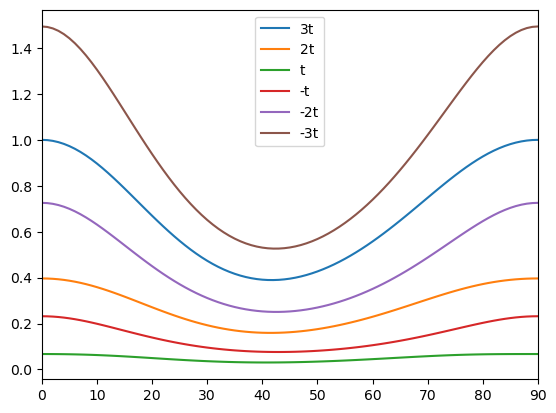

-3t ply fails at the following angles:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
3t ply fails at the following angles:
[]
-2t ply fails at the following angles:
[]
2t ply fails at the following angles:
[]
-t ply fails at the following angles:
[]
t ply fails at the following angles:
[]


In [24]:
Tsai_hill = sigma_x**2 / X_c**2 - sigma_x*sigma_y / X_c**2 + sigma_y**2 / Y_c**2 + tau_xy**2 / S**2
Tsai_hill_func = sym.lambdify([z, theta], Tsai_hill, modules=['numpy'])
theta_range = np.linspace(0, np.pi/2, 91)
plt.plot(np.degrees(theta_range), Tsai_hill_func(3*t, theta_range), label='3t')
plt.plot(np.degrees(theta_range), Tsai_hill_func(2*t, theta_range), label='2t')
plt.plot(np.degrees(theta_range), Tsai_hill_func(t, -theta_range), label='t')
plt.plot(np.degrees(theta_range), Tsai_hill_func(-t, -theta_range), label='-t')
plt.plot(np.degrees(theta_range), Tsai_hill_func(-2*t, theta_range), label='-2t')
plt.plot(np.degrees(theta_range), Tsai_hill_func(-3*t, theta_range), label='-3t')
plt.legend(), plt.xlim(0, 90)
plt.show()
print("-3t ply fails at the following angles:")
print(np.where(Tsai_hill_func(-3*t, theta_range) >= 1)[0])
print("3t ply fails at the following angles:")
print(np.where(Tsai_hill_func(3*t, theta_range) >= 1)[0])
print("-2t ply fails at the following angles:")
print(np.where(Tsai_hill_func(-2*t, theta_range) >= 1)[0])
print("2t ply fails at the following angles:")
print(np.where(Tsai_hill_func(2*t, theta_range) >= 1)[0])
print("-t ply fails at the following angles:")
print(np.where(Tsai_hill_func(-t, theta_range) >= 1)[0])
print("t ply fails at the following angles:")
print(np.where(Tsai_hill_func(t, theta_range) >= 1)[0])